In [1]:
#Pandas: 
from asyncore import read
import pandas as pd

#Matplotlib: 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
from sympy import *
from sympy.abc import theta
from scipy.optimize import curve_fit

#Atropy: 
from astropy import units as u
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
import astropy.coordinates as coord
from astropy.io import fits
from astropy.table import QTable
from astropy.time import Time
from astropy.utils.data import download_file
from astropy.wcs import WCS

In [2]:
#Buscar os dados do sloan a partir das coordenadas do aglomerado de Coma (limites: http://skyserver.sdss.org/dr16/en/help/docs/api.aspx)
# Foi usado o seguinte metodo de encontrar por posição, mostrado: https://www.sdss.org/dr17/tutorials/getdata/#FindbyPosition 
#   SELECT galaxy.objid, galaxy.ra, galaxy.dec, galaxy.g as magnitude, s.z as redshift
#   FROM galaxy, specobj s, dbo.fGetNearbyObjEq(194,27,180) aglomeradoComa
#   WHERE galaxy.objID=s.bestobjID AND galaxy.objID=aglomeradoComa.objID AND s.bestobjID=aglomeradoComa.objID

#lendo o arquivo com os dadods sloan:
Tab = pd.read_csv('coma.csv', header=1)
Tab

,objid,ra,dec,magnitude,redshift
0,1237667444586053720,196.284706,28.234373,22.58551,0.585324
1,1237667323260830515,194.906882,27.332098,21.75322,0.472589
2,1237667912744632525,194.867526,25.692050,19.84105,0.304447
3,1237667322187350696,195.471789,26.351422,21.93289,0.517260
4,1237667442437324818,192.984318,26.786457,17.58324,0.081380
...,...,...,...,...,...
6754,1237667444584153198,191.392338,28.422801,16.89701,0.091844
6755,1237667252944765469,191.994237,28.855437,21.97448,0.467319
6756,1237665440440975368,192.002684,28.589881,24.48626,0.560167
6757,1237667322186040135,192.018691,26.548430,22.58723,0.660798


Text(0, 0.5, 'Declinação (decº)')

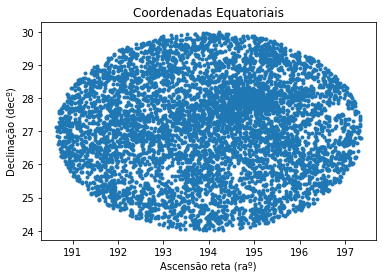

In [3]:
# Fazendo o plot dos dados coletados, usando as coordenadas ra e dec
plt.plot(Tab['ra'],Tab['dec'],'.')
plt.title('Coordenadas Equatoriais')
plt.xlabel('Ascensão reta (raº)')
plt.ylabel('Declinação (decº)')

In [4]:
# Dos dados obtidos vamos selecionar apenas a região onde sabemos que o aglomerado se encontra
#Sabe-se alguns dados sobre aglomerado de Coma, que podem ser encontrados no https://stringfixer.com/pt/Coma_Cluster 
#Ascensão:	12h59m48,7s = 12.9968608h = 194,95º = 3,4 rad
#Declinação: +27°58′50″ =  27.9838889º = 0,49 rad

filter = (Tab['ra'] > 194.0) & (Tab['ra'] < 196.0) & (Tab['dec'] > 27.0) & (Tab['dec'] < 29.0)
df = Tab[filter] 
df

,objid,ra,dec,magnitude,redshift
1,1237667323260830515,194.906882,27.332098,21.75322,0.472589
14,1237667444048331058,194.050374,28.018408,17.86910,0.111479
16,1237667323797897365,195.451200,27.728445,18.13913,0.018286
25,1237667444048658822,194.958769,27.924836,16.69916,0.032797
28,1237667324334571861,194.990049,28.065098,17.27383,0.019484
...,...,...,...,...,...
6720,1237667323797504144,194.307773,27.639511,18.45950,0.067423
6721,1237667323797504287,194.313779,27.729827,17.70884,0.019222
6732,1237667444048592990,194.775094,27.996698,14.98426,0.025575
6748,1237667323797372988,194.082453,27.751027,15.19109,0.022975


Text(0, 0.5, 'Declinação (decº)')

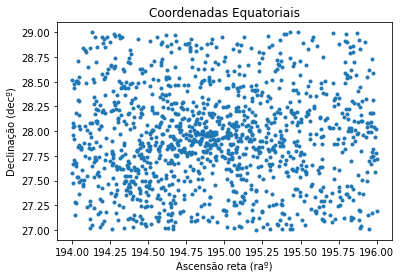

In [5]:
# Fazendo o plot usando as coordenadas ra e dec da região onde o aglomerado se encontra
plt.plot(df['ra'],df['dec'],'.')
plt.title('Coordenadas Equatoriais')
plt.xlabel('Ascensão reta (raº)')
plt.ylabel('Declinação (decº)')

In [6]:
#Dos dados selecionados fazer a média das coordenadas
ra_med = df['ra'].mean()
print("Ascesão reta média =", ra_med,"deg")
dec_med = df['dec'].mean()
print("Declinação média = ", dec_med,"deg")

Ascesão reta média = 194.92688979441337 deg
Declinação média =  27.92822918792757 deg


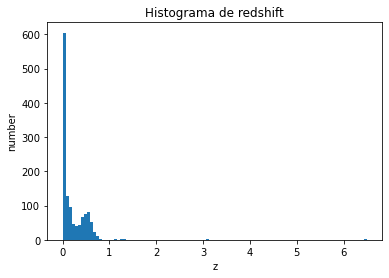

In [7]:
#Fazendo um histograma com os redshifts de toda amostra selecionada:
redshift = df['redshift'].tolist()

plt.hist(redshift, bins=100)
plt.title('Histograma de redshift')
plt.ylabel('number')
plt.xlabel('z')
plt.show()

In [8]:
#Vamos selecionar apenas os daods que estarão entre 0,015 - 0,030. Isto porque é onde se encontra o pico de redshifts
selecao = (df['redshift'] > 0.015) & (df['redshift'] < 0.030)
coma = df[selecao] 
coma

,objid,ra,dec,magnitude,redshift
16,1237667323797897365,195.451200,27.728445,18.13913,0.018286
28,1237667324334571861,194.990049,28.065098,17.27383,0.019484
30,1237667444048724058,195.023672,27.926464,18.30723,0.026533
37,1237667444048592948,194.733085,27.833372,14.83922,0.025103
41,1237667443511722195,194.660042,27.544100,16.01950,0.019913
...,...,...,...,...,...
6684,1237667323797504055,194.386816,27.610347,14.29806,0.020128
6721,1237667323797504287,194.313779,27.729827,17.70884,0.019222
6732,1237667444048592990,194.775094,27.996698,14.98426,0.025575
6748,1237667323797372988,194.082453,27.751027,15.19109,0.022975


In [9]:
#Ou seja é onde o aglomerado de Coma se encontra. Agora realizando a média entre os redshift do filtro 
red_med = coma['redshift'].mean()
print("Redshift médio =", red_med)

Redshift médio = 0.023089094990925603


Text(0, 0.5, 'Declinação (decº)')

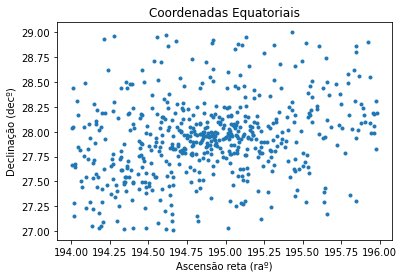

In [10]:
# Fazendo o plot dos usando as coordenadas ra e dec agora para as coordenadas do aglomerado de Coma
plt.plot(coma['ra'],coma['dec'],'.')
plt.title('Coordenadas Equatoriais')
plt.xlabel('Ascensão reta (raº)')
plt.ylabel('Declinação (decº)')

In [11]:
# Agora podemos calcular a distância do agloremardo a partir da a lei de huble v = H0.d ou v = c.z_med
H0 = 67.321       # km/s/Mpc
c = 299792    # km/s
distancia = (red_med * c )/ H0

print("Distância do aglomerado = ", distancia, "Mpc")

Distância do aglomerado =  102.81971398998185 Mpc


In [12]:
# O próximo passo é encontrar o raio efetivo, para isso e preciso saber a luminosidade de cada galáxia dentro do aglomerado
# Para começar este calculo é preciso calcular a distancia radial de cada coordenada que filtramos até agora da região
# Isto é necessário pois na hora que iremos calcular o total de galáxias dentro do aglomerado iremos usa-los
# cos(dec) para correções de ra
declinacao = coma['dec']
assensao = coma['ra']

cos_dec = np.cos(np.radians(declinacao))
ra_corr = np.multiply(assensao,cos_dec)
ra_cor = ra_med* np.cos(np.radians(dec_med))

# Para fazer o calculo da distancia radial, é necessario saber a diferençã dos dados que foram aplicados a correção com os dados coletados tabelados.
ra_dif = ra_corr - ra_cor
dec_dif = declinacao - dec_med

# Distancia até o centro:
dist_centro = np.sqrt((ra_dif**2)+(dec_dif**2))
distancia_radial = distancia * (dist_centro/57.3)
coma['Distancia Radial'] = distancia_radial
coma

C:\Users\pingu\AppData\Local\Temp/ipykernel_12220/200364349.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coma['Distancia Radial'] = distancia_radial


,objid,ra,dec,magnitude,redshift,Distancia Radial
16,1237667323797897365,195.451200,27.728445,18.13913,0.018286,1.447246
28,1237667324334571861,194.990049,28.065098,17.27383,0.019484,0.381722
30,1237667444048724058,195.023672,27.926464,18.30723,0.026533,0.158524
37,1237667444048592948,194.733085,27.833372,14.83922,0.025103,0.174131
41,1237667443511722195,194.660042,27.544100,16.01950,0.019913,0.959038
...,...,...,...,...,...,...
6684,1237667323797504055,194.386816,27.610347,14.29806,0.020128,0.572215
6721,1237667323797504287,194.313779,27.729827,17.70884,0.019222,0.541781
6732,1237667444048592990,194.775094,27.996698,14.98426,0.025575,0.453462
6748,1237667323797372988,194.082453,27.751027,15.19109,0.022975,0.894232


In [13]:
# Com o calculo da distância radial feito para cada ponto do filtro que foi feito,
# vamos atrás das galáxias dentro do raio do aglomerado,isto pois no ultimo plot de pontos usando o ra e dec, 
# Não necessáriamente cada ponto daquele é considerado uma galáxia.
# Para fazer isso tem que fazer com que cada galáxia passe por dentro do raio do aglomerado, raio esse que seria a distancia radial.
# A partir daqui mudei o a tabela até aqui feita para numpy.arrays, isto porque fica mais viavel de fazer os calculos
# tanto de luminosidade cumulativa, magnitude absoluta e velocidades.

desvio_padrao_do_redshift = 0.004162048335264272

# Então como já dito, mudando os dados de pandas para numpy, pegando cada header e trasnformando em lista usando tolist()
# Estou colocando cada coluna como float (pois caso retire, mas para frente nos códigos irá dar erro de float)
obj = coma['objid'].tolist()
obj = [float(i) for i in obj]
ra = coma['ra'].tolist()
ra = [float(i) for i in ra]
dec = coma['dec'].tolist()
dec = [float(i) for i in dec]
magnitude = coma['magnitude'].tolist()
magnitude = [float(i) for i in magnitude]
redshift = coma['redshift'].tolist()
redshift = [float(i) for i in redshift]
dist = coma['Distancia Radial'].tolist()
dist = [float(i) for i in dist]


In [14]:
# Colocando cada dado em uma matriz
dados_coma = [[],[],[],[],[],[],[],[],[],[]]
# Fazendo a comparação entre o raio e o redshift
# Esta comparação serviria como mais um filtro para indentificar as galaxias presentes na amostra
for i in range(len(dist)):
    if dist[i] < 1.5 and (red_med-(desvio_padrao_do_redshift*3)) < redshift[i] and redshift[i] < (red_med+(desvio_padrao_do_redshift*3)):
        dados_coma[0].append(obj[i])
        dados_coma[1].append(ra[i])
        dados_coma[2].append(dec[i])
        dados_coma[3].append(magnitude[i])
        dados_coma[4].append(redshift[i])
        dados_coma[5].append(dist[i])


In [15]:
# Fazendo os mesmos calculos que ultilizamos para calcular distancia, distancia radial, velocidade aplicando no parametro entre o raio e o redshifth

# Fazendo a média em ra
ra_multiplicacao = np.multiply(dados_coma[1],dados_coma[3])
ra_soma = sum(ra_multiplicacao)
tam = sum(dados_coma[3])
ra_med = ra_soma/tam

# Fazendo a média em dec
dec_multiplicacao = np.multiply(dados_coma[2],dados_coma[3])
dec_soma = sum(dec_multiplicacao)
dec_med = dec_soma/tam

# Retirando o redshift médio e o seu desvio padrão.
med, desvio = norm.fit(dados_coma[4])
coma_redshift = med
coma_desvio_padrao = desvio

# Calculando a velocidade usando a Lei de Hubble v = c.z_med
beta_1 = (((red_med+1)**2)-1)/(((red_med+1)**2)+1)
v_coma = beta_1*c

## Agora podemos calcular a distância em Mpc do agloremardo a partir da a lei de hubble v = H0.d
dist_coma = v_coma/H0 

# Refazendo os calculos da distancia radial em cada ponto
cos_dec = np.cos(np.radians(dados_coma[2]))
ra_corr = np.multiply(dados_coma[1],cos_dec)
ra_cor= ra_med* np.cos(np.radians(dec_med))

#Diferenças de ra 
ra_diff = ra_corr - ra_cor
#Diferenças em dec
dec_diff = dados_coma[2] - dec_med

#Distancia até o centro:
ang_sep_1 = np.sqrt((ra_diff**2)+(dec_diff**2))
rad_dist_1 = dist_coma * (ang_sep_1/57.3) 

In [16]:
# Fazendo os dados filtrados na região passar pelo parametro do raio central com o redshift podemos chegar na seguinte conclusão 
print("Existem", str(len(dados_coma[0])) , "Galaxias ")

Existem 409 Galaxias 


In [17]:
# Agora voltamos a nos preocupar em achar o raio efetivo, para isso precisamos calcular a luminosidade das galaxias
# Assim então por primeiro vamos calcular a magnitude absoluta a partir da magnitude puxadas do SDSS
# mudando a distancia de Mpc -> pc
d_pc = 101349980.28454963

# Fazendo o calculo usando as magnitudes: m - M = 5 log d + 5
for a in range(len(dados_coma[0])):
    M = dados_coma[3][a] - (5*np.log10(d_pc)) + 5 
    dados_coma[6].append(M)

In [20]:
# Agora para achar a Luminosidade, vamos usar a magnitude absoluta do Sol
# M = -2,5 log (L/L0)
for a in range(len(dados_coma[0])):
    mag_diff = 4.76 - dados_coma[6][a]
    lum = 2.512 **(mag_diff) #in solar luminosities
    dados_coma[7].append(lum)

In [36]:
# A ideia então é encontrar o raio R que contém metade da L total. Isso pode ser feito ordenando as galáxias em ordem crescente de distância ao centro e somando as luminosidades cumulativamente.
# Portanto vamos ultilizar a  função de distribuição cumulativa das galáxias nos mostrará como a luminosidade de cada galáxia muda dependendo da distância radial.
lum_cum = []
for i in range(150):
    lum_sum = []
    for a in range(len(dist)):
        if dist[a] < ((i+1)/100):
            lum_sum.append(dados_coma[7][a])
    lum_cum.append(sum(lum_sum))
    del lum_sum[:]

cum_lum_norm = lum_cum /max(lum_cum)
cum_dist = np.arange(0,1.5,0.01)

In [37]:
# O raio efetivo do aglomerado de galáxias é basicamente 4/3 do raio de meia massa. 
# Podemos primeiro estimar o raio efetivo usando a fórmula de luminosidade calcula a cima
R_eff = cum_dist[69]
print("O raio efetivo é", str(R_eff) ,"Mpc.")

# Então
r = (4/3)*R_eff
print("Raio de meia massa", str(r) , "Mpc.")

O raio efetivo é 0.6900000000000001 Mpc.
Raio de meia massa 0.92 Mpc.


In [70]:
# Com o raio calcualdo então, vamos então partir para calcular as velocidades,  para usar no modelo de virial
# Por primeiro vamos calcular as dispersão de velocidade de cada galaxia, podemos usar aqui tambem a lei de Hubble 
# Usaremos o desvio padrão das velocidade para calcular a massa do virial
vel = []

for a in range(len(dados_coma[0])):
    beta_vel = (((dados_coma[4][a]+1)**2)-1)/(((dados_coma[4][a]+1)**2)+1)
    v = beta_vel*c
    vel.append(v)


velocidade = np.abs(np.array(vel) - v_coma)
# Usando o fit para achar o desvio padrão da velocidae que no caso conseideramos que é nossa velocidade de dispeção.
med_velcidade, desv_velocidade = norm.fit(velocidade)
vel_disp = desv_velocidade
print ("O desvio padrão das velocidades é: ", vel_disp,"km/s") 

O desvio padrão das velocidades é:  547.1905807791624 km/s


In [71]:
# Por fim então calcular a massa do virial de coma, já que coseguimos usar a formula

G = 6.674E-11 #m^3/kg/s^2
vel_disp = vel_disp * 1000 #m/s
raio = r * 3.086E22 #m

Massa_Coma = (3 * (vel_disp**2) * raio)/G
print("A massa do aglomerado de Coma" , str(Massa_Coma) ,"kg")


A massa do aglomerado de Coma 3.821167077831006e+44 kg


In [75]:
# Bom, agora que obtemos a massa cumulativa do aglomerado em kg, é ideal colocarmos em massas solares. 
# Fazendo a conversão então, podemos ultilizar a M

M = Massa_Coma * 5.02785**-31
print(M ,"massa solar")

6.907872904528144e+22 massa solar
